In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import math

In [3]:
import sys
sys.path.append('../src/main')

In [4]:
from sklearn.model_selection import train_test_split
from dsbase.ModelDSBase import ModelDSBaseWrapper

In [5]:
from dsbase.models.regression.LightGradientBoostingRegressionDSBase import LightGradientBoostingRegressionDSBaseModel
from dsbase.models.regression.LightGradientBoostingRegressionDSBase import LightGradientBoostingRegressionDSBaseModelParamsToMap

/anaconda3/envs/dsbase/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)
/anaconda3/envs/dsbase/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If thi

# Data Loading 

In [6]:
dfA = pd.read_csv('../datasets/predict-sales/dataset1A.csv')
dfB = pd.read_csv('../datasets/predict-sales/dataset1B.csv')
df = pd.concat([dfA,dfB], axis=0)

In [7]:
df.drop(['Unnamed: 0'], inplace=True, axis=1)

# Data Cleaning 

In [8]:
def cleanDataset(df):
    # Removing targets without evidence
    df_cleaned = df[~df['date_block_num'].isna()]
    
    # Imputing features
    df_cleaned['STD(sales.item_cnt_day)_imputed'] = df_cleaned['STD(sales.item_cnt_day)'].apply(lambda x: 0 if (math.isnan(x)) else x)
    df_cleaned['STD(sales.item_price)_imputed'] = df_cleaned['STD(sales.item_price)'].apply(lambda x: 0 if (math.isnan(x)) else x)
    df_cleaned['STD(sales.item_cnt_day)_na_indicator'] = df_cleaned['STD(sales.item_cnt_day)'].apply(lambda x: 1 if (math.isnan(x)) else 0)
    df_cleaned['STD(sales.item_price)_na_indicator'] = df_cleaned['STD(sales.item_price)'].apply(lambda x: 1 if (math.isnan(x)) else 0)
    df_cleaned['SKEW(sales.item_cnt_day)_imputed'] = df_cleaned['SKEW(sales.item_cnt_day)'].apply(lambda x: 0 if (math.isnan(x)) else x)
    df_cleaned['SKEW(sales.item_price)_imputed'] = df_cleaned['SKEW(sales.item_cnt_day)'].apply(lambda x: 0 if (math.isnan(x)) else x)
    df_cleaned['SKEW(sales.item_cnt_day)_na_indicator'] = df_cleaned['SKEW(sales.item_cnt_day)'].apply(lambda x: 1 if (math.isnan(x)) else 0)
    df_cleaned['SKEW(sales.item_price)_na_indicator'] = df_cleaned['SKEW(sales.item_cnt_day)'].apply(lambda x: 1 if (math.isnan(x)) else 0)
    df_cleaned['skew_shop_cat_day_imputed'] = df_cleaned['skew_shop_cat_day'].apply(lambda x: 0 if (math.isnan(x)) else x)
    df_cleaned['skew_shop_cat_item_price_imputed'] = df_cleaned['skew_shop_cat_item_price'].apply(lambda x: 0 if (math.isnan(x)) else x)
    df_cleaned['skew_shop_cat_day_na_indicator'] = df_cleaned['skew_shop_cat_day'].apply(lambda x: 1 if (math.isnan(x)) else 0)
    df_cleaned['skew_shop_cat_item_price_na_indicator'] = df_cleaned['skew_shop_cat_item_price'].apply(lambda x: 1 if (math.isnan(x)) else 0)
    df_cleaned.drop(labels=['STD(sales.item_cnt_day)','STD(sales.item_price)',
                            'SKEW(sales.item_cnt_day)','SKEW(sales.item_price)',
                            'skew_shop_cat_day','skew_shop_cat_item_price'
                           ], inplace=True, axis=1)
    
    # imputing target
    df_cleaned['target_imputed'] = df_cleaned['target'].apply(lambda x: 0 if (math.isnan(x)) else x)
    df_cleaned.drop(labels=['target'], inplace=True, axis=1)
    
    return df_cleaned

In [9]:
df_cleaned = cleanDataset(df)

/anaconda3/envs/dsbase/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/dsbase/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/envs/dsbase/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pa

# Preparing data for ML 

In [10]:
X = df_cleaned.drop(labels=['target_imputed'], axis=1).values
y = df_cleaned['target_imputed'].values

# Simple case (Just first test)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
#params = LightGradientBoostingRegressionDSBaseModelParamsToMap(max_depth=31, n_estimators=100, learning_rate=0.1,num_leaves=31, subsample_for_bin=200000, reg_alpha=0, reg_lambda=0)
params = LightGradientBoostingRegressionDSBaseModelParamsToMap(max_depth=31, n_estimators=100, learning_rate=0.1,num_leaves=31, subsample_for_bin=200000, reg_alpha=3000, reg_lambda=10)
#params = LightGradientBoostingRegressionDSBaseModelParamsToMap(max_depth=20, n_estimators=70, learning_rate=0.1, num_leaves=31, subsample_for_bin=1000000, reg_alpha=100000, reg_lambda=100)
lgbr = ModelDSBaseWrapper('LGBR',X_train,y_train,X_test, y_test,[20,30,40,50,60,70,80,90,100],LightGradientBoostingRegressionDSBaseModel,params)
#lgbr = ModelDSBaseWrapper('LGBR',X_train,y_train,X_test, y_test,[100],LightGradientBoostingRegressionDSBaseModel,params)

X_train size:(1985341, 31)
y_train size:(1985341,)
X_test size:(977856, 31)
y_test size:(977856,)
initiating model LGBR0. LightGradientBoostingRegression
initiating model LGBR1. LightGradientBoostingRegression
initiating model LGBR2. LightGradientBoostingRegression
initiating model LGBR3. LightGradientBoostingRegression
initiating model LGBR4. LightGradientBoostingRegression
initiating model LGBR5. LightGradientBoostingRegression
initiating model LGBR6. LightGradientBoostingRegression
initiating model LGBR7. LightGradientBoostingRegression
initiating model LGBR8. LightGradientBoostingRegression


In [28]:
lgbr.train()

training model LGBR0. LightGradientBoostingRegression
training model LGBR1. LightGradientBoostingRegression
training model LGBR2. LightGradientBoostingRegression
training model LGBR3. LightGradientBoostingRegression
training model LGBR4. LightGradientBoostingRegression
training model LGBR5. LightGradientBoostingRegression
training model LGBR6. LightGradientBoostingRegression
training model LGBR7. LightGradientBoostingRegression
training model LGBR8. LightGradientBoostingRegression


In [29]:
lclgdbr=lgbr.getLearningCurves()

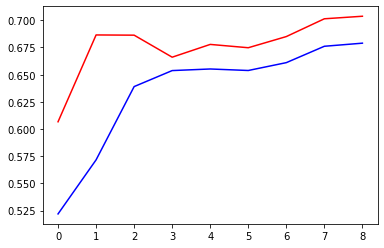

In [30]:
plt.plot(lclgdbr[0,:],'b',lclgdbr[1,:],'r')

In [31]:
lgbr.getScore()

0.7037442152057669

# Ensembling

We will not do it finally, for the moment! 

In [9]:
def processModel(databaseName, modelName):
    dfA = pd.read_csv('../datasets/predict-sales/' + databaseName + 'A.csv')
    dfB = pd.read_csv('../datasets/predict-sales/' + databaseName + 'B.csv')
    df = pd.concat([dfA,dfB], axis=0)
    df.drop(['Unnamed: 0'], inplace=True, axis=1)
    df_cleaned = cleanDataset(df)
    X = df_cleaned.drop(labels=['target_imputed'], axis=1).values
    y = df_cleaned['target_imputed'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    params = LightGradientBoostingRegressionDSBaseModelParamsToMap(max_depth=31, n_estimators=100, learning_rate=0.1,num_leaves=31, subsample_for_bin=200000, reg_alpha=0, reg_lambda=0)
    lgbr = ModelDSBaseWrapper(modelName,X_train,y_train,X_test, y_test,[100],LightGradientBoostingRegressionDSBaseModel,params)
    lgbr.train()
    lclgdbr=lgbr.getLearningCurves()
    print('Score for',modelName,lgbr.getScore())
    return lgbr

## Phase 1 (LightGB for each 1/2 dataset)

In [10]:
model1 = processModel('dataset1','model1')
model1.save()

/anaconda3/envs/dsbase/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/dsbase/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/envs/dsbase/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pa

X_train size:(1985341, 31)
y_train size:(1985341,)
X_test size:(977856, 31)
y_test size:(977856,)
initiating model model10. LightGradientBoostingRegression
training model model10. LightGradientBoostingRegression
Score for model1 0.7126847251609967
saving model: model_persistance/LightGradientBoostingRegression_model10.sav


In [11]:
model2 = processModel('dataset2','model2')
model2.save()

/anaconda3/envs/dsbase/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/dsbase/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/envs/dsbase/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pa

X_train size:(2660634, 31)
y_train size:(2660634,)
X_test size:(1310463, 31)
y_test size:(1310463,)
initiating model model20. LightGradientBoostingRegression
training model model20. LightGradientBoostingRegression
Score for model2 0.6145468812406836
saving model: model_persistance/LightGradientBoostingRegression_model20.sav


In [12]:
model3 = processModel('dataset3','model3')
model3.save()

/anaconda3/envs/dsbase/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/dsbase/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/envs/dsbase/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pa

X_train size:(2995468, 31)
y_train size:(2995468,)
X_test size:(1475381, 31)
y_test size:(1475381,)
initiating model model30. LightGradientBoostingRegression
training model model30. LightGradientBoostingRegression
Score for model3 0.6711301677444654
saving model: model_persistance/LightGradientBoostingRegression_model30.sav


In [13]:
model4 = processModel('dataset4','model4')
model4.save()

/anaconda3/envs/dsbase/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/dsbase/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/envs/dsbase/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pa

X_train size:(3116966, 31)
y_train size:(3116966,)
X_test size:(1535223, 31)
y_test size:(1535223,)
initiating model model40. LightGradientBoostingRegression
training model model40. LightGradientBoostingRegression
Score for model4 0.6796788378710226
saving model: model_persistance/LightGradientBoostingRegression_model40.sav


In [14]:
model5 = processModel('dataset5','model5')
model5.save()

/anaconda3/envs/dsbase/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/dsbase/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/envs/dsbase/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pa

X_train size:(3077159, 31)
y_train size:(3077159,)
X_test size:(1515617, 31)
y_test size:(1515617,)
initiating model model50. LightGradientBoostingRegression
training model model50. LightGradientBoostingRegression
Score for model5 0.5925049164133418
saving model: model_persistance/LightGradientBoostingRegression_model50.sav


In [ ]:
model6 = processModel('dataset6','model6')
model6.save()

## Phase 2 (NN for the 1/2 processed dataset)

Difficult to generate the dataset ... !!!

### Generating 2º dataset processing datasetXB in the previous models

### Training dataset 

# End of Case! 